# مدل سازی ماشین لرنینگ بدون اضافه کردن ویژگی های جدید برای سال های بزرگتر از 2022 تا سال 2032

## وارد کردن کتابخانه‌ها

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import missingno
import h2o
from h2o.estimators import H2ORandomForestEstimator
import warnings
import sklearn
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
warnings.filterwarnings('ignore')

## خواندن داده‌ها

### خواندن داده های 1950 تا 2021

In [2]:
df_estimates = pd.read_excel('../data/WPP2022.xlsx', sheet_name='Estimates', skiprows=16, na_values='...')
# انتخاب تایپ از نوع کشور
df_estimates = df_estimates[df_estimates['Type'] == 'Country/Area'].copy()

# انتخاب ستون های با کوریلیشن کمتر از 0.9
column_list = ["Region, subregion, country or area *",
"Year",
"Births (thousands)",
"Population Density, as of 1 July (persons per square km)",
"Population Sex Ratio, as of 1 July (males per 100 females)",
"Population Growth Rate (percentage)",
"Population Annual Doubling Time (years)",
"Rate of Natural Change (per 1,000 population)",
"Crude Birth Rate (births per 1,000 population)",
"Mean Age Childbearing (years)",
"Sex Ratio at Birth (males per 100 female births)",
"Crude Death Rate (deaths per 1,000 population)",
"Under-Five Deaths, under age 5 (thousands)",
"Net Number of Migrants (thousands)",
"Net Migration Rate (per 1,000 population)",
"Life Expectancy at Birth, both sexes (years)"]

df_estimates = df_estimates[column_list].copy()

# حدف مقادیر تکراری
df_estimates.drop_duplicates(subset=['Region, subregion, country or area *', "Year"], keep='first', inplace=True)
df_estimates.reset_index(drop=True, inplace=True)

In [3]:
df_estimates

,"Region, subregion, country or area *",Year,Births (thousands),"Population Density, as of 1 July (persons per square km)","Population Sex Ratio, as of 1 July (males per 100 females)",Population Growth Rate (percentage),Population Annual Doubling Time (years),"Rate of Natural Change (per 1,000 population)","Crude Birth Rate (births per 1,000 population)",Mean Age Childbearing (years),Sex Ratio at Birth (males per 100 female births),"Crude Death Rate (deaths per 1,000 population)","Under-Five Deaths, under age 5 (thousands)",Net Number of Migrants (thousands),"Net Migration Rate (per 1,000 population)","Life Expectancy at Birth, both sexes (years)"
0,Burundi,1950.0,116.224,86.864,91.947,2.200,31.507,27.788,51.334,30.995,102.5,23.546,29.001,-13.343,-5.893,40.579
1,Burundi,1951.0,117.067,88.757,92.145,2.114,32.788,26.799,50.678,30.996,102.5,23.879,30.669,-13.217,-5.721,40.812
2,Burundi,1952.0,117.770,90.618,92.319,2.036,34.045,26.118,49.933,31.026,102.5,23.815,31.272,-13.715,-5.815,41.003
3,Burundi,1953.0,119.013,92.451,92.488,1.969,35.203,25.844,49.448,31.030,102.5,23.604,31.644,-14.962,-6.216,41.282
4,Burundi,1954.0,119.972,94.287,92.650,1.965,35.275,25.536,48.883,31.036,102.5,23.347,31.915,-14.599,-5.948,41.558
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17059,Wallis and Futuna Islands,2017.0,0.153,85.257,93.562,-1.106,NaN,5.985,12.713,30.007,104.8,6.728,0.002,-0.201,-16.706,77.531
17060,Wallis and Futuna Islands,2018.0,0.147,84.396,93.301,-0.923,NaN,5.611,12.381,30.012,104.8,6.770,0.002,-0.171,-14.368,77.861
17061,Wallis and Futuna Islands,2019.0,0.144,83.671,93.109,-0.802,NaN,6.112,12.189,30.025,104.8,6.077,0.002,-0.171,-14.489,79.617
17062,Wallis and Futuna Islands,2020.0,0.140,83.246,92.955,-0.215,NaN,5.154,11.997,30.021,104.8,6.843,0.002,-0.083,-7.096,78.764


### خواندن داده های 2022

In [4]:
df_medium = pd.read_excel('../data/WPP2022.xlsx', sheet_name='Medium variant', skiprows=16, na_values='...')

# انتخاب تایپ از نوع کشور
df_medium = df_medium[df_medium['Type'] == 'Country/Area'].copy()

# انتخاب ستون های با کوریلیشن کمتر از 0.9
df_medium = df_medium[column_list].copy()

# انتخاب سال 2022
df_medium = df_medium[(df_medium['Year'] >= 2022) & (df_medium['Year'] <= 2032)].copy()
df_medium.reset_index(drop=True, inplace=True)

# حدف مقادیر تکراری
df_medium.drop_duplicates(subset=['Region, subregion, country or area *', "Year"], keep='first', inplace=True)
df_medium.reset_index(drop=True, inplace=True)

In [5]:
df_medium

,"Region, subregion, country or area *",Year,Births (thousands),"Population Density, as of 1 July (persons per square km)","Population Sex Ratio, as of 1 July (males per 100 females)",Population Growth Rate (percentage),Population Annual Doubling Time (years),"Rate of Natural Change (per 1,000 population)","Crude Birth Rate (births per 1,000 population)",Mean Age Childbearing (years),Sex Ratio at Birth (males per 100 female births),"Crude Death Rate (deaths per 1,000 population)","Under-Five Deaths, under age 5 (thousands)",Net Number of Migrants (thousands),"Net Migration Rate (per 1,000 population)","Life Expectancy at Birth, both sexes (years)"
0,Burundi,2022.0,439.648,496.708,98.648,2.695,25.720,26.798,34.109,30.652,102.5,7.311,22.214,2.000,0.155,61.977
1,Burundi,2023.0,443.059,510.156,98.681,2.648,26.176,26.329,33.467,30.638,102.5,7.138,22.966,2.000,0.151,62.500
2,Burundi,2024.0,447.212,523.763,98.700,2.617,26.486,26.017,32.902,30.625,102.5,6.885,23.280,2.000,0.147,63.266
3,Burundi,2025.0,450.531,537.501,98.709,2.562,27.055,25.474,32.300,30.612,102.4,6.826,23.136,2.000,0.143,63.446
4,Burundi,2026.0,457.042,551.361,98.714,2.530,27.397,25.162,31.941,30.599,102.4,6.779,23.086,2.000,0.140,63.621
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2602,Wallis and Futuna Islands,2028.0,0.130,80.482,89.052,-0.382,NaN,3.618,11.509,29.998,104.8,7.891,0.001,-0.069,-6.101,80.931
2603,Wallis and Futuna Islands,2029.0,0.132,80.300,88.751,-0.071,NaN,3.584,11.681,29.996,104.8,8.097,0.001,-0.061,-5.407,81.069
2604,Wallis and Futuna Islands,2030.0,0.134,80.211,88.462,-0.151,NaN,3.615,11.900,29.995,104.8,8.285,0.001,-0.054,-4.795,81.221
2605,Wallis and Futuna Islands,2031.0,0.136,80.139,88.183,-0.027,NaN,3.631,12.114,29.993,104.8,8.483,0.001,-0.047,-4.178,81.348


## بررسی داده ها

### داده های سال های 1950-2021

Region, subregion, country or area *                             0
Year                                                             0
Births (thousands)                                              72
Population Density, as of 1 July (persons per square km)         0
Population Sex Ratio, as of 1 July (males per 100 females)      72
Population Growth Rate (percentage)                              0
Population Annual Doubling Time (years)                       3374
Rate of Natural Change (per 1,000 population)                   72
Crude Birth Rate (births per 1,000 population)                  72
Mean Age Childbearing (years)                                   72
Sex Ratio at Birth (males per 100 female births)                72
Crude Death Rate (deaths per 1,000 population)                  72
Under-Five Deaths, under age 5 (thousands)                      72
Net Number of Migrants (thousands)                              72
Net Migration Rate (per 1,000 population)                     

//////////////////////////////////////


Region, subregion, country or area *                           object
Year                                                          float64
Births (thousands)                                            float64
Population Density, as of 1 July (persons per square km)      float64
Population Sex Ratio, as of 1 July (males per 100 females)    float64
Population Growth Rate (percentage)                           float64
Population Annual Doubling Time (years)                       float64
Rate of Natural Change (per 1,000 population)                 float64
Crude Birth Rate (births per 1,000 population)                float64
Mean Age Childbearing (years)                                 float64
Sex Ratio at Birth (males per 100 female births)              float64
Crude Death Rate (deaths per 1,000 population)                float64
Under-Five Deaths, under age 5 (thousands)                    float64
Net Number of Migrants (thousands)                            float64
Net Migration Rate (

//////////////////////////////////////


<Axes: >

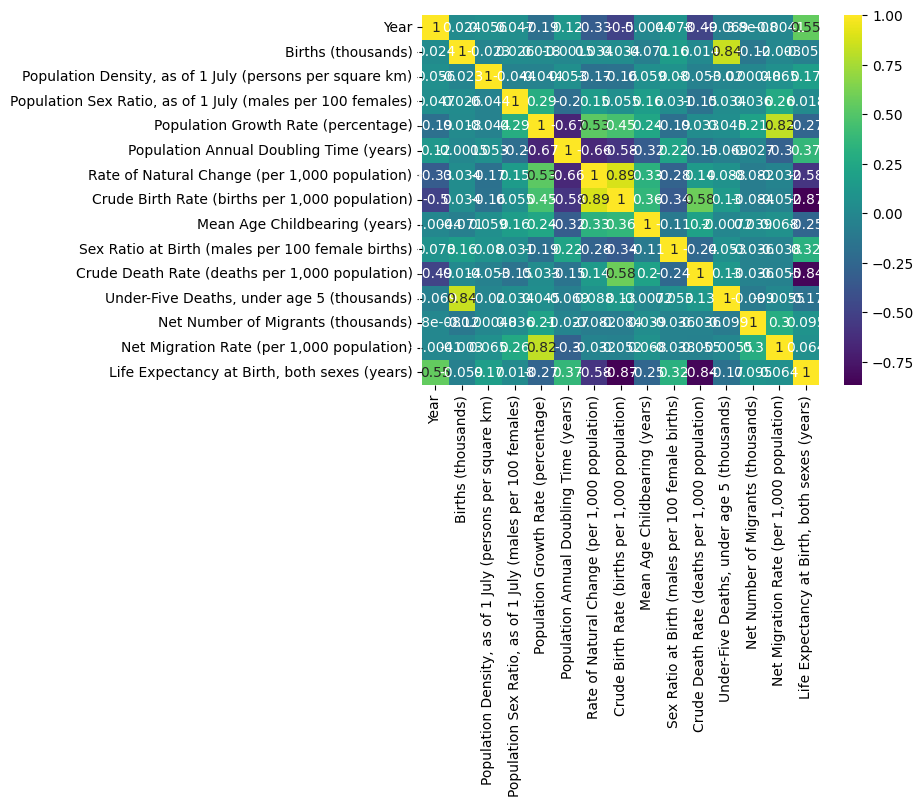

In [6]:
# بررسی تعداد مقادیر نال هر یک از ستون ها
display(df_estimates.isna().sum())
print("//////////////////////////////////////")

# بررسی dtype ستون ها
display(df_estimates.dtypes)
print("//////////////////////////////////////")

# بررسی کوریلیشن ستون ها
sns.heatmap(df_estimates.corr(), annot=True, cmap='viridis')

### داده های سال 2022

Region, subregion, country or area *                             0
Year                                                             0
Births (thousands)                                              11
Population Density, as of 1 July (persons per square km)         0
Population Sex Ratio, as of 1 July (males per 100 females)      11
Population Growth Rate (percentage)                              0
Population Annual Doubling Time (years)                       1049
Rate of Natural Change (per 1,000 population)                   11
Crude Birth Rate (births per 1,000 population)                  11
Mean Age Childbearing (years)                                   11
Sex Ratio at Birth (males per 100 female births)                11
Crude Death Rate (deaths per 1,000 population)                  11
Under-Five Deaths, under age 5 (thousands)                      11
Net Number of Migrants (thousands)                              11
Net Migration Rate (per 1,000 population)                     

Region, subregion, country or area *                           object
Year                                                          float64
Births (thousands)                                            float64
Population Density, as of 1 July (persons per square km)      float64
Population Sex Ratio, as of 1 July (males per 100 females)    float64
Population Growth Rate (percentage)                           float64
Population Annual Doubling Time (years)                       float64
Rate of Natural Change (per 1,000 population)                 float64
Crude Birth Rate (births per 1,000 population)                float64
Mean Age Childbearing (years)                                 float64
Sex Ratio at Birth (males per 100 female births)              float64
Crude Death Rate (deaths per 1,000 population)                float64
Under-Five Deaths, under age 5 (thousands)                    float64
Net Number of Migrants (thousands)                            float64
Net Migration Rate (

//////////////////////////////////////


<Axes: >

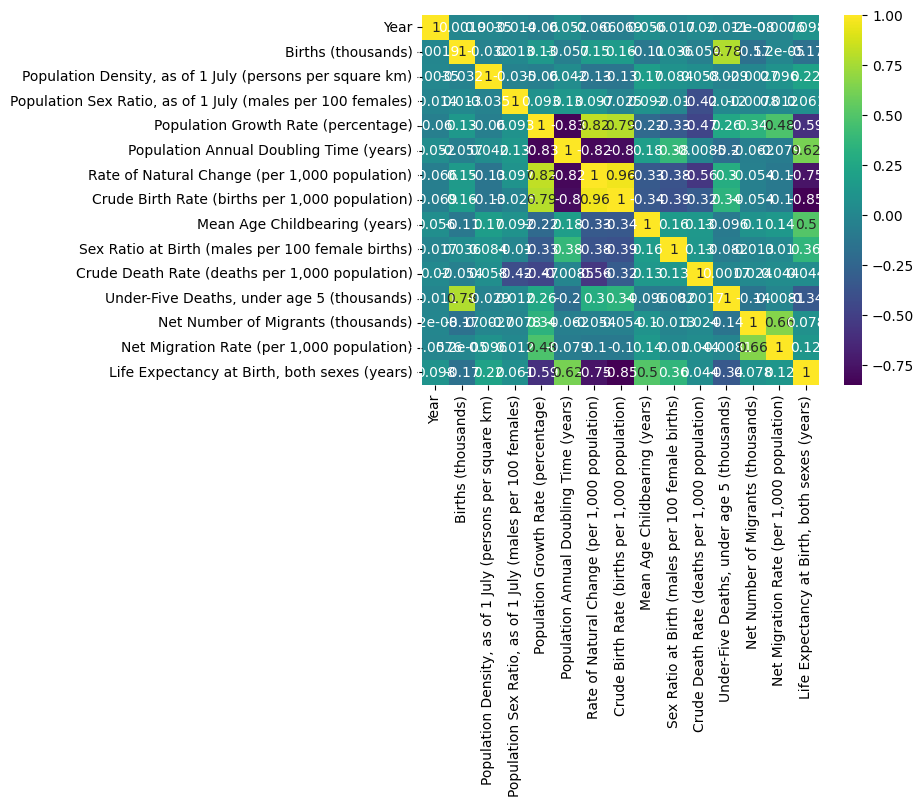

In [7]:
# بررسی تعداد مقادیر نال هر یک از ستون ها
print(df_medium.isna().sum())
print("//////////////////////////////////////")

# بررسی dtype ستون ها
display(df_medium.dtypes)
print("//////////////////////////////////////")

# بررسی کوریلیشن ستون ها
sns.heatmap(df_medium.corr(), annot=True, cmap='viridis')

## پیش پردازش

In [8]:
# حذف ستون: Population Annual Doubling Time (years)
df_estimates.drop(columns=["Population Annual Doubling Time (years)"], inplace=True)
df_medium.drop(columns=["Population Annual Doubling Time (years)"], inplace=True)

## مدل سازی با h20

In [9]:
target = "Life Expectancy at Birth, both sexes (years)"
train = df_estimates.copy()
train.dropna(subset=["Life Expectancy at Birth, both sexes (years)"], inplace=True)
test = df_medium.copy()
test.dropna(subset=["Life Expectancy at Birth, both sexes (years)"], inplace=True)

In [10]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 17.0.6+9-LTS-190, mixed mode, sharing)
  Starting server from D:\Projects\LifeExpectancy\venv\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\amira\AppData\Local\Temp\tmpm4sjlsxp
  JVM stdout: C:\Users\amira\AppData\Local\Temp\tmpm4sjlsxp\h2o_amira_started_from_python.out
  JVM stderr: C:\Users\amira\AppData\Local\Temp\tmpm4sjlsxp\h2o_amira_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Asia/Tehran
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.1
H2O_cluster_version_age:,8 days
H2O_cluster_name:,H2O_from_python_amira_eiju5x
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.975 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [11]:
h2o_train_data = h2o.H2OFrame(train)
h2o_test_data = h2o.H2OFrame(test)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [12]:
X_columns = h2o_train_data.columns
X_columns.remove(target)

x_test_columns = h2o_test_data.columns
x_test_columns.remove(target)


In [13]:
model = H2ORandomForestEstimator(ntrees=50, max_depth=20, nfolds=10, seed=42)
model.train(x=X_columns, y=target, training_frame=h2o_train_data)

drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2ORandomForestEstimator : Distributed Random Forest
Model Key: DRF_model_python_1676641271748_1


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    50                 50                          6.96616e+06            20           20           20            9377          9978          9636.82

ModelMetricsRegression: drf
** Reported on train data. **

MSE: 0.4788374740942859
RMSE: 0.6919808336177281
MAE: 0.39705556670591957
RMSLE: 0.01638311885681625
Mean Residual Deviance: 0.4788374740942859

ModelMetricsRegression: drf
** Reported on cross-validation data. **

MSE: 0.4666239234999363
RMSE: 0.6830987655529296
MAE: 0.37180281512369084
RMSLE: 0.017779843958829297
Mean Residual Deviance: 0.4666239234999363

Cross-Validation Metrics Summary: 
                        mean       sd           cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid    cv_6_valid    cv_7_valid    cv_8_valid    cv_9_valid    cv_10_valid
----------------------  ---------  -----------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  -------------
mae                     0.371758   0.00845614   0.368097      0.3621        0.365904      0.377644      0.375625      0.390097      0.366834      0.376438      0.37148       0.363362
mean_residual_deviance  0.466323   0.118327     0.37989       0.417243      0.330495      0.629708      0.608683      0.649111      0.349645      0.431316      0.420801      0.446339
mse                     0.466323   0.118327     0.37989       0.417243      0.330495      0.629708      0.608683      0.649111      0.349645      0.431316      0.420801      0.446339
r2                      0.996769   0.000862956  0.997355      0.997266      0.997758      0.995514      0.995609      0.995615      0.997633      0.996977      0.997025      0.996936
residual_deviance       0.466323   0.118327     0.37989       0.417243      0.330495      0.629708      0.608683      0.649111      0.349645      0.431316      0.420801      0.446339
rmse                    0.678141   0.0846405    0.616353      0.645944      0.574887      0.793542      0.780181      0.805674      0.591308      0.656747      0.648692      0.668086
rmsle                   0.0165639  0.00678104   0.0116374     0.0126783     0.00967179    0.0247592     0.0256182     0.0265385     0.0100892     0.012002      0.0191053     0.0135395

Scoring History: 
    timestamp            duration          number_of_trees    training_rmse    training_mae    training_deviance
--  -------------------  ----------------  -----------------  ---------------  --------------  -------------------
    2023-02-17 17:12:37  1 min 19.123 sec  0                  nan              nan             nan
    2023-02-17 17:12:37  1 min 19.483 sec  1                  1.54886          0.820695        2.39898
    2023-02-17 17:12:37  1 min 19.759 sec  2                  1.51023          0.802864        2.28078
    2023-02-17 17:12:38  1 min 20.003 sec  3                  1.4261           0.772569        2.03377
    2023-02-17 17:12:38  1 min 20.298 sec  4                  1.29945          0.727175        1.68858
    2023-02-17 17:12:38  1 min 20.542 sec  5                  1.22512          0.701294        1.50091
    2023-02-17 17:12:38  1 min 20.764 sec  6                  1.13758          0.670143        1.2941
    2023-02-17 17:12:39  1 min 21.031 sec  7                  1.08905          0.645677        1.18602
    2023-02-17 17:12:39  1 min 21.295 sec  8                  1.04661          0.61955         1.0954
    2023-02-17 17:12:39  1 min 21.579 sec  9                  0.98919          0.5931          0.978497
    2023-02-1

In [14]:
# predict
pred_test = model.predict(h2o_test_data)
pred_train = model.predict(h2o_train_data)


drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [15]:
# compare with test data
pred_df_test = pred_test.as_data_frame()
pred_df_train = pred_train.as_data_frame()

# r^2 score train
print("r^2 score_train: ", r2_score(train[target], pred_df_train['predict']))
# r^2 score test
print("r^2 score_test: ", r2_score(test[target], pred_df_test['predict']))
print("//////////////////////////////////////")

# mean absolute error train
print("mean absolute error_train: ", mean_absolute_error(train[target], pred_df_train['predict']))
# mean absolute error test
print("mean absolute error_test: ", mean_absolute_error(test[target], pred_df_test['predict']))
print("//////////////////////////////////////")

# mean squared error train
print("mean squared error_train: ", mean_squared_error(train[target], pred_df_train['predict']))
# mean squared error test
print("mean squared error_test: ", mean_squared_error(test[target], pred_df_test['predict']))
print("//////////////////////////////////////")

# mean absolute percentage error train
print("mean absolute percentage error_train: ", mean_absolute_percentage_error(train[target], pred_df_train['predict']))
# mean absolute percentage error test
print("mean absolute percentage error_test: ", mean_absolute_percentage_error(test[target], pred_df_test['predict']))
print("//////////////////////////////////////")



r^2 score_train:  0.999533477062641
r^2 score_test:  0.9420573769314079
//////////////////////////////////////
mean absolute error_train:  0.14903468471956344
mean absolute error_test:  1.467589116572599
//////////////////////////////////////
mean squared error_train:  0.0676073174129189
mean squared error_test:  3.1177893456921284
//////////////////////////////////////
mean absolute percentage error_train:  0.0025896284311613753
mean absolute percentage error_test:  0.01920180655792501
//////////////////////////////////////


### رسم نمودار

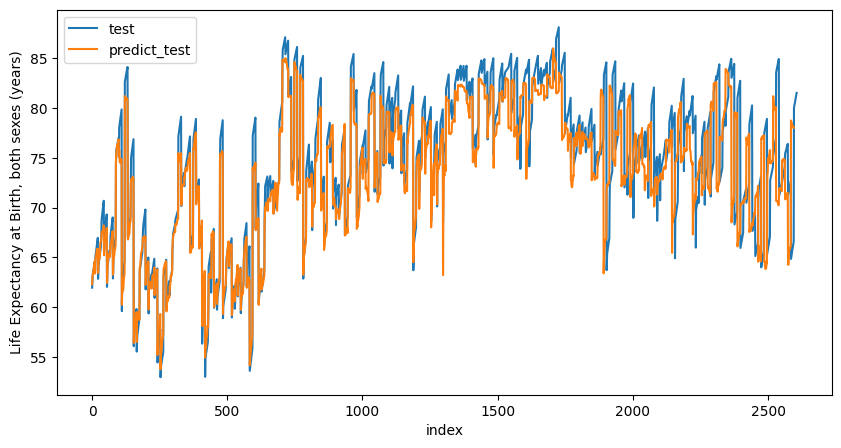

In [16]:
# plot
plt.figure(figsize=(10, 5))
plt.plot(test[target], label='test')
plt.plot(pred_df_test['predict'], label='predict_test')
plt.xlabel('index')
plt.ylabel(target)
plt.legend()